In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [3]:
model = VGG16(weights='imagenet', include_top=False)

In [4]:
img_path = 'image_copy/cabbage/cabbage_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [7]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [8]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [11]:
trdata = ImageDataGenerator()
testdata = trdata.flow_from_directory(directory="image_copy/train", target_size=(224,224))
tsdata = ImageDataGenerator()                        
traindata = tsdata.flow_from_directory(directory="image_copy/test", target_size=(224,224))

Found 5400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [29]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata,
                           validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - 165s 16s/step - loss: 1.0992 - accuracy: 0.3237 - val_loss: 1.0991 - val_accuracy: 0.3156
Epoch 2/10
10/10 [==============================] - 168s 17s/step - loss: 1.0989 - accuracy: 0.3344 - val_loss: 1.0984 - val_accuracy: 0.3750
Epoch 3/10
10/10 [==============================] - 167s 17s/step - loss: 1.3936 - accuracy: 0.3205 - val_loss: 2.3562 - val_accuracy: 0.3406
Epoch 4/10
10/10 [==============================] - 165s 17s/step - loss: 1.3841 - accuracy: 0.2885 - val_loss: 1.1052 - val_accuracy: 0.2937
Epoch 5/10
 3/10 [========>.....................] - ETA: 1:01 - loss: 1.2029 - accuracy: 0.3977WARNING:tensorflow:Can save best model only with val_acc available, skipping.


10/10 [==============================] - 164s 16s/step - loss: 1.1276 - accuracy: 0.3429 - val_loss: 1.0972 - val_accuracy: 0.3500
Epoch 6/10
10/10 [==============================] - 167s 17s/step - loss: 1.0999 - accuracy: 0.3406 - val_loss: 1.0944 - val_accuracy: 0.3781
Epoch 7/10
10/10 [==============================] - 164s 16s/step - loss: 1.0971 - accuracy: 0.3397 - val_loss: 1.1004 - val_accuracy: 0.3438
Epoch 8/10
10/10 [==============================] - 164s 16s/step - loss: 1.1020 - accuracy: 0.3429 - val_loss: 1.0989 - val_accuracy: 0.3656
Epoch 9/10
 7/10 [====================>.........] - ETA: 38s - loss: 1.1258 - accuracy: 0.3036WARNING:tensorflow:Can save best model only with val_acc available, skipping.


10/10 [==============================] - 169s 17s/step - loss: 1.1203 - accuracy: 0.3094 - val_loss: 3.0189 - val_accuracy: 0.3156
Epoch 10/10
10/10 [==============================] - 166s 17s/step - loss: 1.2870 - accuracy: 0.3397 - val_loss: 1.0981 - val_accuracy: 0.3594


{'loss': [1.1011879444122314, 1.1043869256973267, 1.1000087261199951, 1.0988216400146484, 1.100056767463684], 'accuracy': [0.3173076808452606, 0.3125, 0.3333333432674408, 0.3333333432674408, 0.34062498807907104], 'val_loss': [1.0964324474334717, 1.1006646156311035, 1.0975347757339478, 1.0969874858856201, 1.0992119312286377], 'val_accuracy': [0.33125001192092896, 0.3218750059604645, 0.34062498807907104, 0.359375, 0.32499998807907104]}


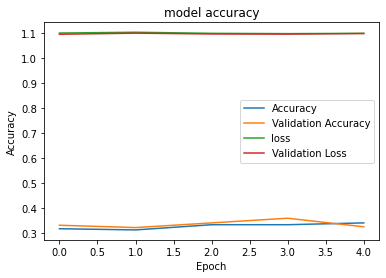

In [21]:
import matplotlib.pyplot as plt
print(hist.history)
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

In [22]:
model.save("vgg16")

INFO:tensorflow:Assets written to: vgg16\assets


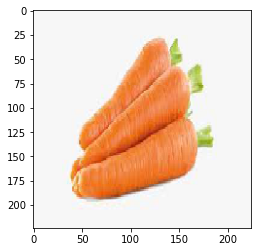

In [23]:
from keras.preprocessing import image
import tensorflow as tf
img = image.load_img("image_copy/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
loaded_model = tf.keras.models.load_model('vgg16')

In [24]:
img = image.load_img("image_copy/cabbage/cabbage_1.jpg",target_size=(224,224))
img = np.asarray(img)

img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
output

array([[0.34468797, 0.3280165 , 0.32729548]], dtype=float32)

In [25]:
output = loaded_model.predict(img)
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output


cabbage


array([[0.34468797, 0.3280165 , 0.32729548]], dtype=float32)

cabbage


array([[0.34468538, 0.3280076 , 0.32730702]], dtype=float32)

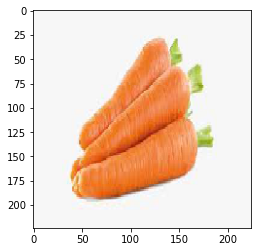

In [26]:
img = image.load_img("image_copy/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
img1 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output

cabbage


array([[0.3446858, 0.3280027, 0.3273115]], dtype=float32)

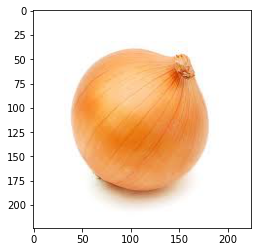

In [27]:
img = image.load_img("image_copy/onion/onion_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
img2 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output
